# UCF-Crime Anomaly Detection - Colab Setup

Setup notebook for running MIL Ranking Loss re-implementation on Google Colab.

## 1. Check GPU

In [13]:
!nvidia-smi

# Verify PyTorch can use GPU
import torch
print(f"\nPyTorch CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"CUDA version: {torch.version.cuda}")

Sat Nov 29 05:36:41 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8             11W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 2. Mount Google Drive

**Prerequisites:**
1. Upload features.zip and annotations.zip to Google Drive
2. Google Drive structure:
```
MyDrive/
└── Colab Notebooks/
    └── data_distribution/
        ├── features.zip
        └── annotations.zip
```

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 3. Clone Repository

In [ ]:
!git clone https://github.com/KwonPodo/MILRankingLoss_Sultani2018_ReImplementation.git
%cd MILRankingLoss_Sultani2018_ReImplementation

## 4. Install Packages

**Note:** Using `requirements-colab.txt` to avoid package conflicts

In [15]:
# Install minimal packages for Colab (avoid conflicts)
!pip install -r requirements-colab.txt -q

# Check installed package versions
import torch
import numpy as np
print(f"PyTorch: {torch.__version__}")
print(f"NumPy: {np.__version__}")

PyTorch: 2.9.0+cu126
NumPy: 2.0.2


## 5. Extract Data

Extract features from Google Drive.

In [16]:
import os

# Verify working directory
%cd /content/MILRankingLoss_Sultani2018_ReImplementation
!pwd

# Create data directory
!mkdir -p data

# Google Drive path
DRIVE_DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/data_distribution'

# Extract features
!cp "{DRIVE_DATA_PATH}/features.zip" data/
!unzip -q data/features.zip -d data/
!rm data/features.zip

print("Features extracted")
!ls -lh data/

/content/MILRankingLoss_Sultani2018_ReImplementation
/content/MILRankingLoss_Sultani2018_ReImplementation
Features extracted
total 4.0K
drwxr-xr-x 17 root root 4.0K Oct 31 17:28 features


## 6. Extract Annotations

Extract annotation files from Google Drive.

In [17]:
# Extract annotations from Google Drive
!cp "{DRIVE_DATA_PATH}/annotations.zip" data/
!unzip -q data/annotations.zip -d data/
!rm data/annotations.zip

print("Annotations extracted")
!ls -lh data/annotations/

Annotations extracted
total 100K
-rwxr-xr-x 1 root root 16K Jan  3  2023 Temporal_Anomaly_Annotation_for_Testing_Videos.txt
-rwxr-xr-x 1 root root 13K Oct 31 17:28 test_set.txt
-rwxr-xr-x 1 root root 66K Oct 31 17:28 train_set.txt


## 7. Verify Dataset

In [18]:
# Verify working directory
%cd /content/MILRankingLoss_Sultani2018_ReImplementation

# Check feature categories
!ls data/features/

# Check sample counts
!echo "Train samples:"
!wc -l data/annotations/train_set.txt
!echo "Test samples:"
!wc -l data/annotations/test_set.txt

/content/MILRankingLoss_Sultani2018_ReImplementation
Abuse	Assault    Fighting	  Shooting     Testing_Normal_Videos_Anomaly
Arrest	Burglary   RoadAccidents  Shoplifting  Training_Normal_Videos_Anomaly
Arson	Explosion  Robbery	  Stealing     Vandalism
Train samples:
1610 data/annotations/train_set.txt
Test samples:
290 data/annotations/test_set.txt


## 8. Test Dataset Loading

In [19]:
%cd /content/MILRankingLoss_Sultani2018_ReImplementation
!PYTHONPATH=/content/MILRankingLoss_Sultani2018_ReImplementation:$PYTHONPATH python scripts/test_dataset.py

/content/MILRankingLoss_Sultani2018_ReImplementation
Total samples in dataset: 1610
Positive samples: 810
Negative samples: 800

First batch:

Positive bags: torch.Size([30, 32, 4096])

Negative bags: torch.Size([30, 32, 4096])
Batch 0: pos=30, neg=30
Batch 1: pos=30, neg=30
Batch 2: pos=30, neg=30
Batch 3: pos=30, neg=30


## 9. Test Model

In [20]:
%cd /content/MILRankingLoss_Sultani2018_ReImplementation
!PYTHONPATH=/content/MILRankingLoss_Sultani2018_ReImplementation:$PYTHONPATH python scripts/test_model.py

/content/MILRankingLoss_Sultani2018_ReImplementation
Model architecture:
AnomalyDetector(
  (fc1): Linear(in_features=4096, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.6, inplace=False)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

Total parameters: 2,114,113

Positive scores shape: torch.Size([30, 32])
Negative scores shape: torch.Size([30, 32])
Score range: [0.4536, 0.5444]

Total loss: 1.0362
  Ranking loss: 0.9972
  Smoothness loss: 0.3768
  Sparsity loss: 486.6053

Training mode loss: 1.0335


## 10. Start Training

### Option 1: Train without WandB

In [21]:
%cd /content/MILRankingLoss_Sultani2018_ReImplementation
!PYTHONPATH=/content/MILRankingLoss_Sultani2018_ReImplementation:$PYTHONPATH python train.py --config configs/default.yaml --no-wandb

/content/MILRankingLoss_Sultani2018_ReImplementation
Loaded config from configs/default.yaml
Using device: cuda
Train dataset: 1610 videos
Positive samples: 810
Negative samples: 800
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Total batches per epoch: 26
Model parameters: 2,114,113
Optimizer: adam

Starting training for 100 epochs...
Epoch 1:   0% 0/26 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smal

## 11. Evaluate

Evaluate trained model.

In [22]:
%cd /content/MILRankingLoss_Sultani2018_ReImplementation
!PYTHONPATH=/content/MILRankingLoss_Sultani2018_ReImplementation:$PYTHONPATH python evaluate.py \
    --config configs/default.yaml \
    --checkpoint checkpoints/best_model.pth \
    --temporal-annotation data/annotations/Temporal_Anomaly_Annotation_for_Testing_Videos.txt

/content/MILRankingLoss_Sultani2018_ReImplementation
Loaded config from configs/default.yaml
Using device: cuda
Loaded model from checkpoints/best_model.pth
Epoch: 58, Loss: 1.0027
Test dataset: 290 videos
Loaded temporal annotations for 290 videos

Evaluating model...
Evaluating: 100% 290/290 [00:13<00:00, 21.86it/s]

Total segments evaluated: 9280
Anomaly segments: 1685 (18.2%)
Normal segments: 7595 (81.8%)

Calculating ROC curve...
ROC curve saved to results/roc_curve.png

AUC: 0.6684
Results saved to results/evaluation_results.json

Optimal threshold: 0.0870
  TPR: 0.6510
  FPR: 0.3951

Summary saved to results/evaluation_summary.txt


## 12. View Results

/content/MILRankingLoss_Sultani2018_ReImplementation


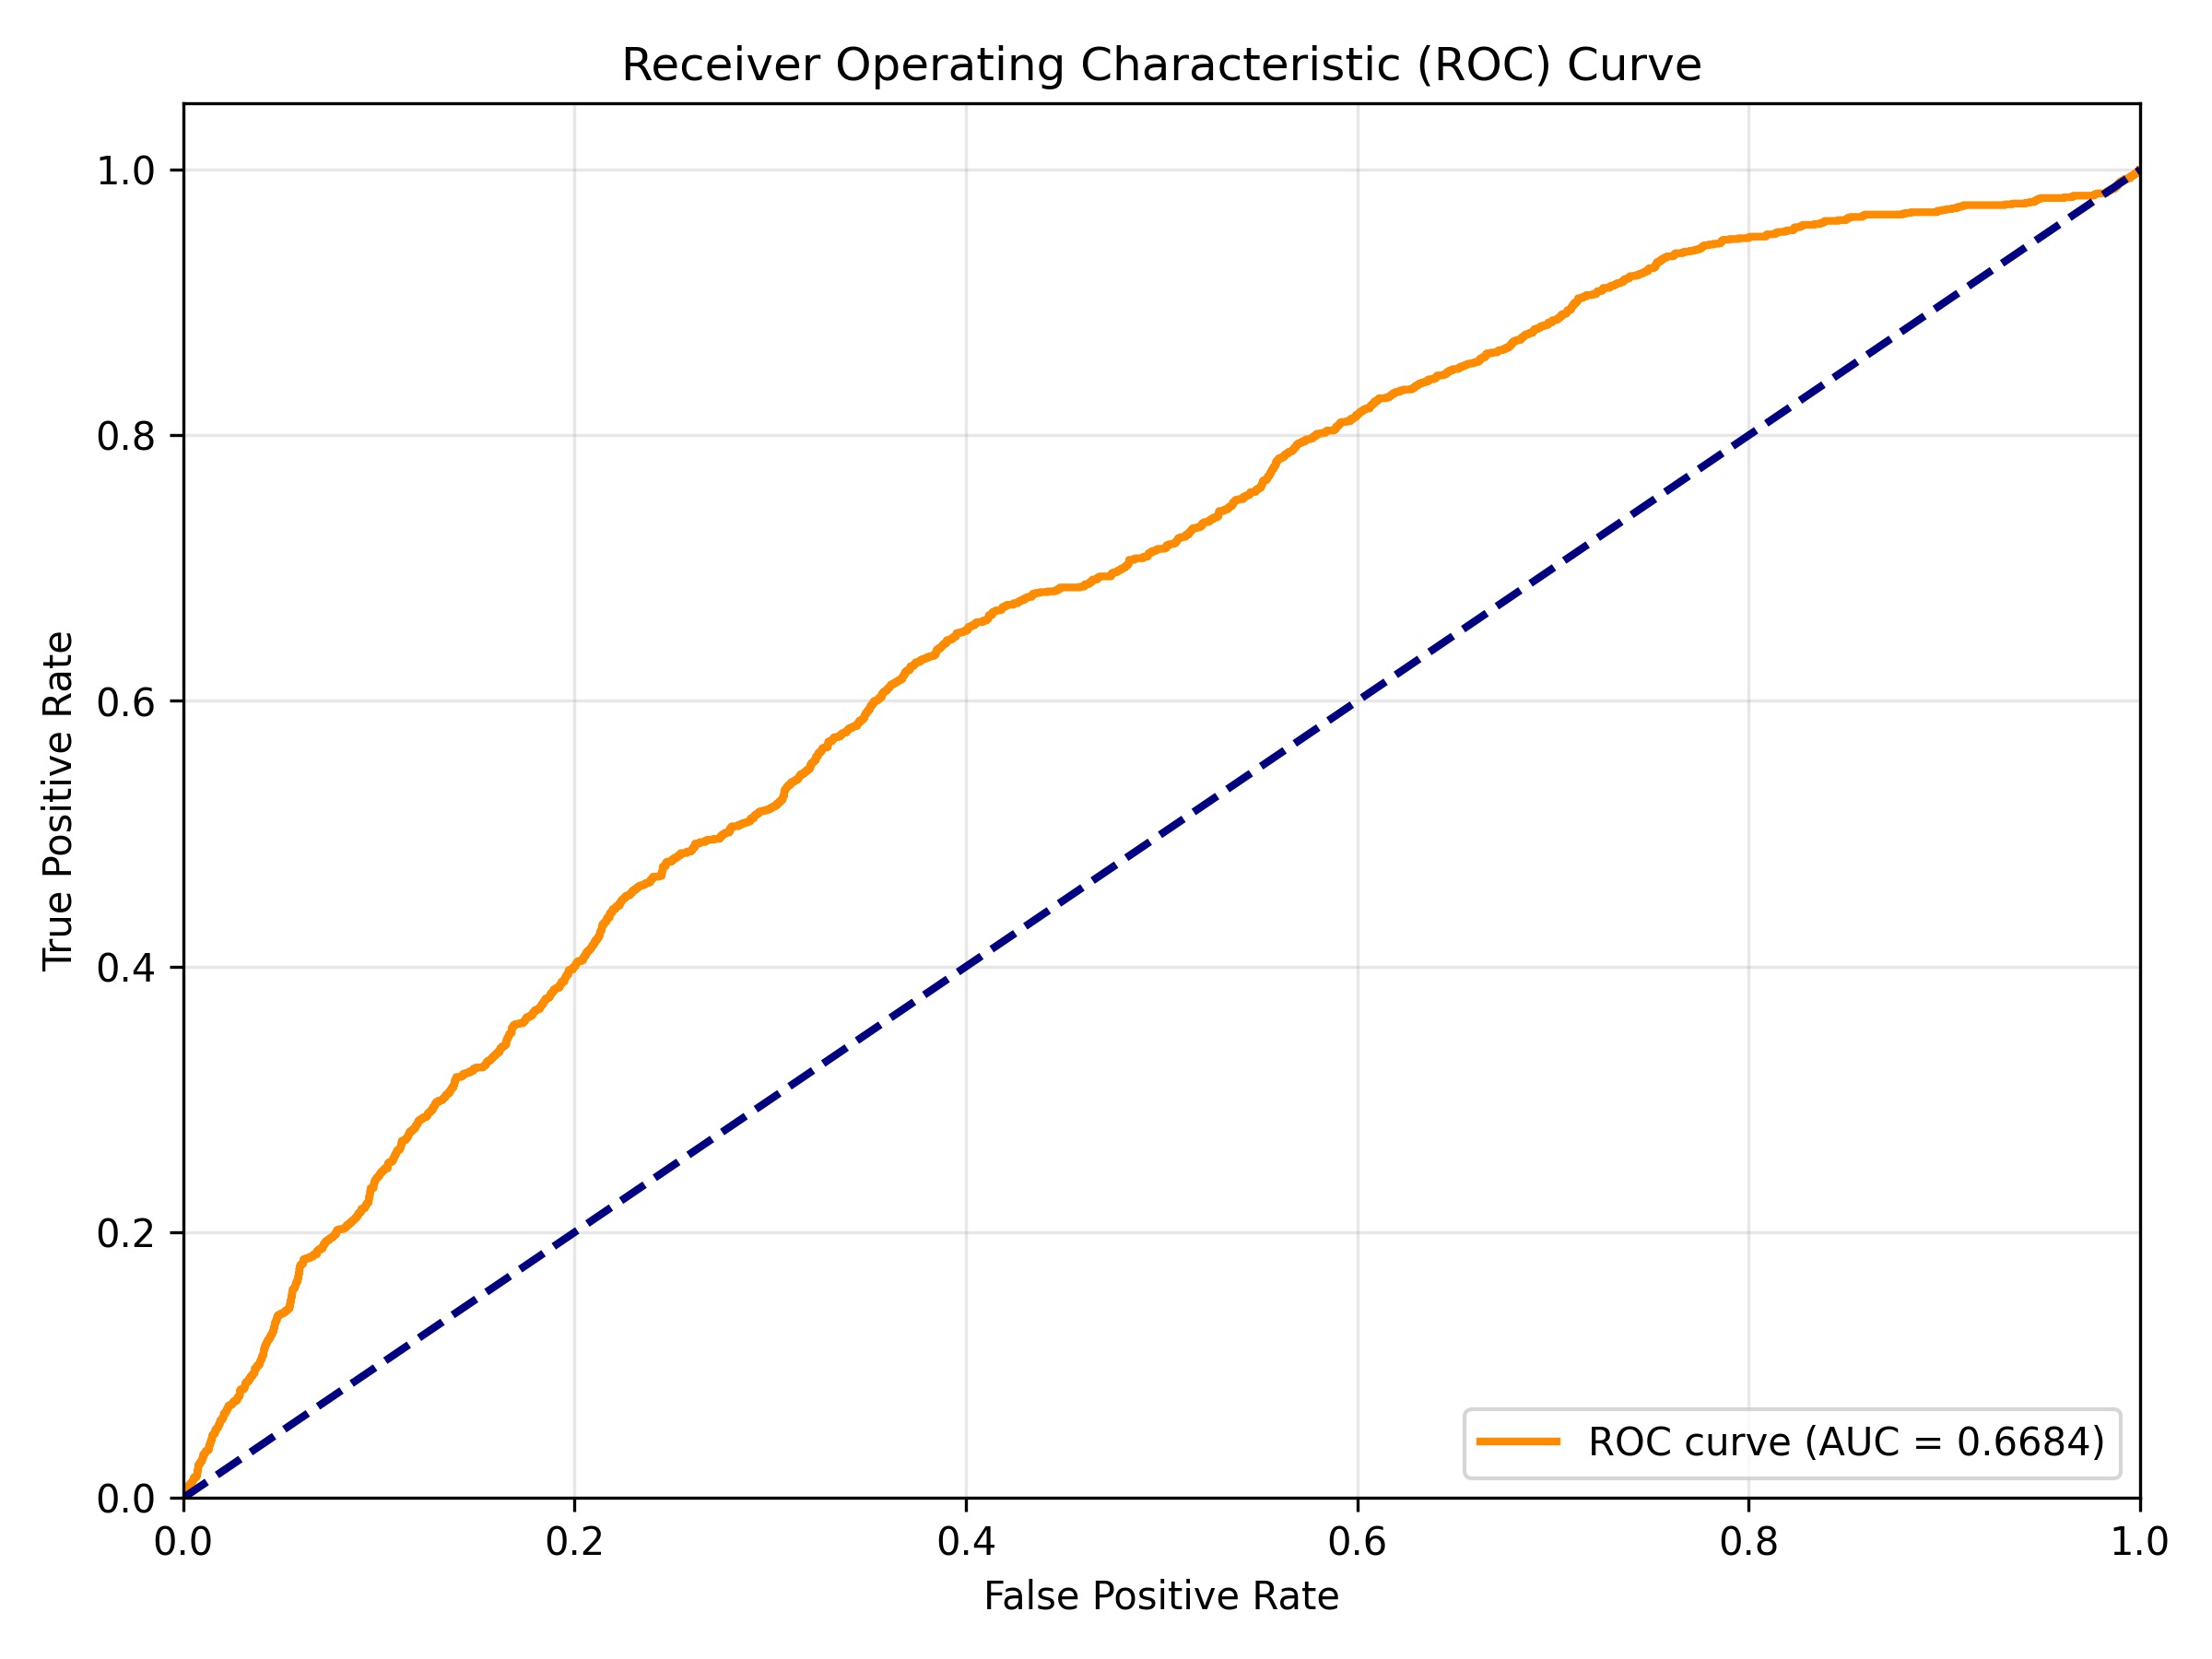

Evaluation Summary
Model: checkpoints/best_model.pth
Test videos: 290
Total segments: 9280
Anomaly segments: 1685 (18.2%)

Results:
  AUC: 0.6684
  Optimal threshold: 0.0870
  TPR at optimal: 0.6510
  FPR at optimal: 0.3951


In [23]:
%cd /content/MILRankingLoss_Sultani2018_ReImplementation

# Display ROC curve
from IPython.display import Image, display
import os

if os.path.exists('results/roc_curve.png'):
    display(Image('results/roc_curve.png'))

# Print evaluation results
if os.path.exists('results/evaluation_summary.txt'):
    !cat results/evaluation_summary.txt

## 13. (Optional) Save Results to Google Drive

In [24]:
%cd /content/MILRankingLoss_Sultani2018_ReImplementation

# Backup checkpoints and results to Drive
DRIVE_DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/data_distribution'
!mkdir -p "{DRIVE_DATA_PATH}/results"
!cp -r checkpoints "{DRIVE_DATA_PATH}/"
!cp -r results "{DRIVE_DATA_PATH}/"

print("Results saved to Google Drive")

/content/MILRankingLoss_Sultani2018_ReImplementation
Results saved to Google Drive


In [25]:
%cd /content/MILRankingLoss_Sultani2018_ReImplementation

# Check extracted data size
!echo "Data directory size:"
!du -sh data/

!echo "\nFeatures size:"
!du -sh data/features/

!echo "\nAnnotations size:"
!du -sh data/annotations/

!echo "\nTotal disk usage:"
!df -h /content

/content/MILRankingLoss_Sultani2018_ReImplementation
Data directory size:
3.7G	data/
\nFeatures size:
3.7G	data/features/
\nAnnotations size:
104K	data/annotations/
\nTotal disk usage:
Filesystem      Size  Used Avail Use% Mounted on
overlay         113G   45G   68G  40% /


Improvement of the baseline code:

In [30]:
import torch
import torch.nn as nn

class AnomalyDetector(nn.Module):
    """
    3-layer fully connected network for anomaly detection, extended with LSTM layers.

    Architecture:
    - LSTM: Input (4096) -> Hidden (256) -> Output (LSTM output)
    - FC1: LSTM output -> 512 (ReLU + Dropout)
    - FC2: 512 -> 256 (ReLU + Dropout)
    - FC3: 256 -> 32 (ReLU + Dropout)
    - FC4: 32 -> 1 (Sigmoid)
    """

    def __init__(self, input_dim=4096, lstm_hidden_size=256, dropout=0.5, batch_norm=True, lstm_num_layers=2):
        super(AnomalyDetector, self).__init__()

        # LSTM Layer
        self.lstm = nn.LSTM(input_size=input_dim, hidden_size=lstm_hidden_size, num_layers=lstm_num_layers, batch_first=True)

        # Fully Connected Layers
        self.fc1 = nn.Linear(lstm_hidden_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 32)
        self.fc4 = nn.Linear(32, 1)

        # Batch Normalization (optional)
        self.batch_norm = batch_norm
        if self.batch_norm:
            self.bn1 = nn.BatchNorm1d(512)
            self.bn2 = nn.BatchNorm1d(256)
            self.bn3 = nn.BatchNorm1d(32)

        # Dropout and activation
        self.dropout = nn.Dropout(dropout)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        """
        Args:
            x: (batch_size, num_segments, feature_dim)
               e.g., (30, 32, 4096)

        Returns:
            scores: (batch_size, num_segments)
                    Anomaly score for each segment (0~1)
        """
        batch_size, num_segments, feature_dim = x.shape

        # Process through LSTM
        lstm_out, (hn, cn) = self.lstm(x)  # LSTM output for all time steps

        # Use the last hidden state as the feature for classification
        x = lstm_out[:, -1, :]  # (batch_size, lstm_hidden_size)

        # Fully connected layers with batch normalization and dropout
        x = self.fc1(x)
        if self.batch_norm:
            x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc2(x)
        if self.batch_norm:
            x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc3(x)
        if self.batch_norm:
            x = self.bn3(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc4(x)  # Final layer
        x = self.sigmoid(x)  # Anomaly score in range [0, 1]

        return x  # Returning the anomaly score for the whole video

In [29]:
import torch
import torch.nn as nn

class MILRankingLoss(nn.Module):
    """
    Multiple Instance Learning Ranking Loss with sparsity, smoothness, and L2 regularization constraints.

    Loss formula:
    loss = hinge_loss + λ1 * smoothness + λ2 * sparsity + λ3 * L2_regularization

    where:
    - hinge_loss = max(0, 1 - max(pos_scores) + max(neg_scores))
    - smoothness = sum of squared differences between adjacent segments
    - sparsity = sum of all positive bag scores
    - L2_regularization = weight decay on model weights
    """

    def __init__(self, lambda1=0.00008, lambda2=0.00008, lambda3=0.0001):
        """
        Args:
            lambda1: weight for temporal smoothness constraint
            lambda2: weight for sparsity constraint
            lambda3: weight for L2 regularization (model weights)
        """
        super(MILRankingLoss, self).__init__()
        self.lambda1 = lambda1
        self.lambda2 = lambda2
        self.lambda3 = lambda3

    def forward(self, pos_scores, neg_scores, model=None):
        """
        Args:
            pos_scores: (batch_pos, num_segments) - scores for positive bags
            neg_scores: (batch_neg, num_segments) - scores for negative bags
            model: (optional) The model from which to calculate L2 regularization loss

        Returns:
            total_loss: scalar tensor
            loss_dict: dictionary with individual loss components for logging
        """
        # MIL ranking loss: max score of positive bag should be higher than negative
        pos_max = torch.max(pos_scores, dim=1)[0]  # (batch_pos,)
        neg_max = torch.max(neg_scores, dim=1)[0]  # (batch_neg,)

        # Hinge loss
        ranking_loss = torch.clamp(
            1.0 - pos_max.mean() + neg_max.mean(),
            min=0
        )

        # Temporal smoothness: minimize difference between adjacent segments
        smoothness_loss = 0
        if pos_scores.size(1) > 1:  # if more than 1 segment
            temporal_diff = pos_scores[:, 1:] - pos_scores[:, :-1]  # (batch, 31)
            smoothness_loss = torch.sum(temporal_diff ** 2)

        # Sparsity: minimize sum of all scores (encourage sparse anomalies)
        sparsity_loss = torch.sum(pos_scores)

        # L2 Regularization: apply L2 penalty on model parameters
        l2_loss = 0
        if model is not None:
            for param in model.parameters():
                l2_loss += torch.sum(param ** 2)

        # Total loss
        total_loss = ranking_loss + self.lambda1 * smoothness_loss + self.lambda2 * sparsity_loss + self.lambda3 * l2_loss

        return total_loss, {
            'ranking_loss': ranking_loss.item(),
            'smoothness_loss': smoothness_loss.item() if isinstance(smoothness_loss, torch.Tensor) else 0.0,
            'sparsity_loss': sparsity_loss.item(),
            'l2_loss': l2_loss.item() if isinstance(l2_loss, torch.Tensor) else 0.0
        }

In [35]:
import torch
from torch.utils.data import Dataset
import numpy as np
from pathlib import Path


class C3DFeatureDataset(Dataset):
    """
    Load pre-extracted C3D features for MIL-based anomaly detection.
    Features are already divided into 32 segments (clips).
    Download C3D features from: https://drive.google.com/drive/folders/1rhOuAdUqyJU4hXIhToUnh5XVvYjQiN50?usp=sharing
    """

    def __init__(self, annotation_path, features_root, num_segments=32):
        """
        Args:
            annotation_path: path to train/test annotation file
            features_root: root directory containing feature folders
            num_segments: expected number of segments (should be 32)
        """
        self.features_root = Path(features_root)
        self.num_segments = num_segments

        # Parse annotation file
        self.samples = []
        with open(annotation_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 2:
                    video_name, label = parts
                    self.samples.append({
                        'video_name': video_name,
                        'label': int(label)
                    })

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        sample = self.samples[idx]

        # Load C3D features
        feature_path = self.features_root / f"{sample['video_name']}.txt"
        features = self._load_features(feature_path)

        return {
            'features': torch.FloatTensor(features),  # (32, 4096)
            'label': sample['label'],
            'video_name': sample['video_name']
        }

    def _load_features(self, feature_path):
        """
        Load features from .txt file.
        Expected format: 32 lines, each with 4096 space-separated floats.
        """
        features = np.loadtxt(feature_path, dtype=np.float32)

        # Sanity check
        assert features.shape == (self.num_segments, 4096), \
            f"Expected shape (32, 4096), got {features.shape} for {feature_path}"

        return features


def collate_fn(batch):
    """
    Custom collate function for MIL.
    Separate positive and negative bags for ranking loss.
    """
    pos_features, neg_features = [], []
    pos_labels, neg_labels = [], []
    pos_names, neg_names = [], []

    for item in batch:
        if item['label'] == 1:
            pos_features.append(item['features'])
            pos_labels.append(item['label'])
            pos_names.append(item['video_name'])
        else:
            neg_features.append(item['features'])
            neg_labels.append(item['label'])
            neg_names.append(item['video_name'])

    # Stack to tensors
    result = {}

    if pos_features:
        result['pos_features'] = torch.stack(pos_features)  # (num_pos, 32, 4096)
        result['pos_labels'] = torch.tensor(pos_labels)
        result['pos_names'] = pos_names
    else:
        result['pos_features'] = None
        result['pos_labels'] = None
        result['pos_names'] = []

    if neg_features:
        result['neg_features'] = torch.stack(neg_features)  # (num_neg, 32, 4096)
        result['neg_labels'] = torch.tensor(neg_labels)
        result['neg_names'] = neg_names
    else:
        result['neg_features'] = None
        result['neg_labels'] = None
        result['neg_names'] = []

    return result

In [36]:
import logging
import wandb
from pathlib import Path

class Logger:
    def __init__(self, config, use_wandb=True):
        self.use_wandb = use_wandb

        # Console logger
        logging.basicConfig(
            level=logging.INFO,
            format='%(asctime)s - %(levelname)s - %(message)s'
        )
        self.logger = logging.getLogger(__name__)

        # W&B
        if use_wandb:
            wandb.init(
                project=config['wandb']['project'],
                entity=config['wandb'].get('entity'),
                config=config,
                tags=config['wandb'].get('tags', [])
            )

    def log(self, metrics, step=None):
        """Console + W&B Logging"""
        self.logger.info(f"Step {step}: {metrics}")
        if self.use_wandb:
            wandb.log(metrics, step=step)

    def log_model(self, model_path):
        """Save model to W&B"""
        if self.use_wandb:
            wandb.save(str(model_path))

In [37]:
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt


def compute_auc(labels, scores):
    """Compute ROC-AUC"""
    fpr, tpr, _ = roc_curve(labels, scores)
    return auc(fpr, tpr)


def plot_roc(labels, scores, save_path=None):
    """Plot ROC curve"""
    fpr, tpr, _ = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
                label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.close()

    return roc_auc


def plot_precision_recall(labels, scores, save_path=None):
    """Plot Precision-Recall curve"""
    precision, recall, _ = precision_recall_curve(labels, scores)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid(alpha=0.3)

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.close()

In [38]:
import random
from torch.utils.data import Sampler


class BalancedBatchSampler(Sampler):
    """
    Sample equal number of positive and negative samples per batch.
    """

    def __init__(self, dataset, batch_size=60):
        """
        Args:
            dataset: C3DFeatureDataset instance
            batch_size: total batch size (must be even)
        """
        assert batch_size % 2 == 0, "Batch size must be even"

        self.batch_size = batch_size
        self.samples_per_class = batch_size // 2  # 30 each

        # Separate positive and negative indices
        self.pos_indices = []
        self.neg_indices = []

        for idx, sample in enumerate(dataset.samples):
            if sample['label'] == 1:
                self.pos_indices.append(idx)
            else:
                self.neg_indices.append(idx)

        print(f"Positive samples: {len(self.pos_indices)}")
        print(f"Negative samples: {len(self.neg_indices)}")

        # Calculate number of batches
        self.num_batches = min(
            len(self.pos_indices) // self.samples_per_class,
            len(self.neg_indices) // self.samples_per_class
        )

    def __iter__(self):
        # Shuffle indices
        pos_shuffled = random.sample(self.pos_indices, len(self.pos_indices))
        neg_shuffled = random.sample(self.neg_indices, len(self.neg_indices))

        for i in range(self.num_batches):
            # Get 30 positive and 30 negative
            pos_batch = pos_shuffled[i * self.samples_per_class : (i + 1) * self.samples_per_class]
            neg_batch = neg_shuffled[i * self.samples_per_class : (i + 1) * self.samples_per_class]

            # Combine and shuffle
            batch = pos_batch + neg_batch
            random.shuffle(batch)

            yield batch

    def __len__(self):
        return self.num_batches

In [42]:
import yaml
import torch
from torch.utils.data import DataLoader
import torch.optim as optim
from pathlib import Path
from tqdm import tqdm
import wandb
import random
from torch.utils.data import Sampler


class BalancedBatchSampler(Sampler):
    """
    Sample equal number of positive and negative samples per batch.
    """

    def __init__(self, dataset, batch_size=60):
        """
        Args:
            dataset: C3DFeatureDataset instance
            batch_size: total batch size (must be even)
        """
        assert batch_size % 2 == 0, "Batch size must be even"

        self.batch_size = batch_size
        self.samples_per_class = batch_size // 2  # 30 each

        # Separate positive and negative indices
        self.pos_indices = []
        self.neg_indices = []

        for idx, sample in enumerate(dataset.samples):
            if sample['label'] == 1:
                self.pos_indices.append(idx)
            else:
                self.neg_indices.append(idx)

        print(f"Positive samples: {len(self.pos_indices)}")
        print(f"Negative samples: {len(self.neg_indices)}")

        # Calculate number of batches
        self.num_batches = min(
            len(self.pos_indices) // self.samples_per_class,
            len(self.neg_indices) // self.samples_per_class
        )

    def __iter__(self):
        # Shuffle indices
        pos_shuffled = random.sample(self.pos_indices, len(self.pos_indices))
        neg_shuffled = random.sample(self.neg_indices, len(self.neg_indices))

        for i in range(self.num_batches):
            # Get 30 positive and 30 negative
            pos_batch = pos_shuffled[i * self.samples_per_class : (i + 1) * self.samples_per_class]
            neg_batch = neg_shuffled[i * self.samples_per_class : (i + 1) * self.samples_per_class]

            # Combine and shuffle
            batch = pos_batch + neg_batch
            random.shuffle(batch)

            yield batch

    def __len__(self):
        return self.num_batches

# Add a simple check for Jupyter environment
try:
    get_ipython()  # Check if running in a Jupyter notebook environment
    in_notebook = True
except NameError:
    in_notebook = False


def load_config(config_path):
    """Load configuration from yaml file"""
    with open(config_path, 'r') as f:
        config = yaml.safe_load(f)
    return config


def build_model(config, device):
    """Build model and move to device"""
    model = AnomalyDetector(
        input_dim=config['model']['input_dim'],
        dropout=config['model']['dropout']
    )
    model = model.to(device)
    return model


def build_optimizer(model, config):
    """Build optimizer"""
    optimizer_name = config['training']['optimizer'].lower()
    lr = config['training']['learning_rate']
    weight_decay = config['training']['lambda3']

    if optimizer_name == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    elif optimizer_name == 'adagrad':
        optimizer = optim.Adagrad(model.parameters(), lr=lr, weight_decay=weight_decay)
    elif optimizer_name == 'adamw':  # Add support for AdamW
        optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    else:
        raise ValueError(f"Unknown optimizer: {optimizer_name}")

    return optimizer


def train_epoch(model, loader, criterion, optimizer, device, epoch):
    """Train one epoch"""
    model.train()

    epoch_loss = 0.0
    epoch_ranking_loss = 0.0
    epoch_smoothness_loss = 0.0
    epoch_sparsity_loss = 0.0

    progress_bar = tqdm(loader, desc=f"Epoch {epoch}")

    for batch_idx, batch in enumerate(progress_bar):
        pos_features = batch['pos_features']
        neg_features = batch['neg_features']

        if pos_features is None or neg_features is None:
            continue

        pos_features = pos_features.to(device)
        neg_features = neg_features.to(device)

        # Forward
        pos_scores = model(pos_features)
        neg_scores = model(neg_features)

        # Loss
        loss, loss_dict = criterion(pos_scores, neg_scores)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accumulate losses
        epoch_loss += loss.item()
        epoch_ranking_loss += loss_dict['ranking_loss']
        epoch_smoothness_loss += loss_dict['smoothness_loss']
        epoch_sparsity_loss += loss_dict['sparsity_loss']

        # Update progress bar
        progress_bar.set_postfix({
            'loss': f"{loss.item():.4f}",
            'rank': f"{loss_dict['ranking_loss']:.4f}"
        })

    num_batches = len(loader)
    avg_loss = epoch_loss / num_batches
    avg_ranking = epoch_ranking_loss / num_batches
    avg_smoothness = epoch_smoothness_loss / num_batches
    avg_sparsity = epoch_sparsity_loss / num_batches

    return {
        'loss': avg_loss,
        'ranking_loss': avg_ranking,
        'smoothness_loss': avg_smoothness,
        'sparsity_loss': avg_sparsity
    }


def save_checkpoint(model, optimizer, epoch, loss, save_path):
    """Save model checkpoint"""
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss
    }
    torch.save(checkpoint, save_path)


def main(config):
    # Setup device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Create checkpoint directory
    checkpoint_dir = Path('checkpoints')
    checkpoint_dir.mkdir(exist_ok=True)

    # Build dataset
    train_dataset = C3DFeatureDataset(
        annotation_path=config['data']['train_annotation_path'],
        features_root=config['data']['feature_path']
    )
    print(f"Train dataset: {len(train_dataset)} videos")

    # Build sampler and loader
    sampler = BalancedBatchSampler(
        train_dataset,
        batch_size=config['training']['batch_size']
    )

    train_loader = DataLoader(
        train_dataset,
        batch_sampler=sampler,
        collate_fn=collate_fn,
        num_workers=4
    )
    print(f"Total batches per epoch: {len(train_loader)}")

    # Build model
    model = build_model(config, device)
    print(f"Model parameters: {sum(p.numel() for p in model.parameters()):,}")

    # Build optimizer
    optimizer = build_optimizer(model, config)
    print(f"Optimizer: {config['training']['optimizer']}")

    # Build loss
    criterion = MILRankingLoss(
    lambda1=config['training']['lambda1'],
    lambda2=config['training']['lambda2']
)

    # Training loop
    num_epochs = config['training']['num_epochs']
    best_loss = float('inf')

    print(f"\nStarting training for {num_epochs} epochs...")

    for epoch in range(1, num_epochs + 1):
        metrics = train_epoch(model, train_loader, criterion, optimizer, device, epoch)

        print(f"Epoch {epoch}/{num_epochs}")
        print(f"  Loss: {metrics['loss']:.4f}")
        print(f"  Ranking: {metrics['ranking_loss']:.4f}")
        print(f"  Smoothness: {metrics['smoothness_loss']:.4f}")
        print(f"  Sparsity: {metrics['sparsity_loss']:.4f}")

        # Save checkpoint
        if epoch % 10 == 0 or metrics['loss'] < best_loss:
            save_path = checkpoint_dir / f'epoch_{epoch}.pth'
            save_checkpoint(model, optimizer, epoch, metrics['loss'], save_path)
            print(f"  Saved checkpoint: {save_path}")

            if metrics['loss'] < best_loss:
                best_loss = metrics['loss']
                best_path = checkpoint_dir / 'best_model.pth'
                save_checkpoint(model, optimizer, epoch, metrics['loss'], best_path)
                print(f"  New best model: {best_path}")

    print("\nTraining completed!")


# Default config for notebook execution
config = {
    'wandb': {
        'project': 'IntelligentVision_Assignment2_MIL_Sultani2018'
    },
    'data': {
        'feature_path': 'data/features/',
        'train_annotation_path': 'data/annotations/train_set.txt',
        'test_annotation_path': 'data/annotations/test_set.txt'
    },
    'model': {
        'input_dim': 4096,
        'hidden_dims': [512, 256, 32],  # Added an additional hidden layer (256 units) for more expressiveness
        'dropout': 0.5,  # Reduced dropout from 0.6 to 0.5 for better regularization balance
        'batch_norm': True  # Added option for batch normalization
    },
    'training': {
        'batch_size': 32,
        'learning_rate': 0.001,
        'num_epochs': 100,
        'lambda1': 0.00008,
        'lambda2': 0.00008,
        'lambda3': 0.01,
        'optimizer': 'adamw',
        'scheduler': "step",  # Added learning rate scheduler
        'scheduler_step_size': 30,  # Step size for learning rate decay
        'scheduler_gamma': 0.1
    }
}

# If running in notebook, we directly call main with the default config
if in_notebook:
    main(config)

Using device: cuda
Train dataset: 1610 videos
Positive samples: 810
Negative samples: 800
Total batches per epoch: 50
Model parameters: 2,114,113
Optimizer: adamw

Starting training for 100 epochs...


Epoch 1: 100%|██████████| 50/50 [01:07<00:00,  1.36s/it, loss=1.0058, rank=0.9904]


Epoch 1/100
  Loss: 1.0068
  Ranking: 0.9897
  Smoothness: 1.5047
  Sparsity: 211.7003
  Saved checkpoint: checkpoints/epoch_1.pth
  New best model: checkpoints/best_model.pth


Epoch 2: 100%|██████████| 50/50 [01:09<00:00,  1.40s/it, loss=0.6753, rank=0.6596]


Epoch 2/100
  Loss: 0.9068
  Ranking: 0.8917
  Smoothness: 13.8485
  Sparsity: 175.1067
  Saved checkpoint: checkpoints/epoch_2.pth
  New best model: checkpoints/best_model.pth


Epoch 3: 100%|██████████| 50/50 [01:09<00:00,  1.39s/it, loss=0.6470, rank=0.6369]


Epoch 3/100
  Loss: 0.7521
  Ranking: 0.7407
  Smoothness: 32.8035
  Sparsity: 109.1117
  Saved checkpoint: checkpoints/epoch_3.pth
  New best model: checkpoints/best_model.pth


Epoch 4: 100%|██████████| 50/50 [01:08<00:00,  1.36s/it, loss=0.6863, rank=0.6765]


Epoch 4/100
  Loss: 0.6615
  Ranking: 0.6502
  Smoothness: 47.2668
  Sparsity: 94.3866
  Saved checkpoint: checkpoints/epoch_4.pth
  New best model: checkpoints/best_model.pth


Epoch 5: 100%|██████████| 50/50 [01:05<00:00,  1.32s/it, loss=0.6537, rank=0.6470]


Epoch 5/100
  Loss: 0.6054
  Ranking: 0.5955
  Smoothness: 48.1330
  Sparsity: 76.0599
  Saved checkpoint: checkpoints/epoch_5.pth
  New best model: checkpoints/best_model.pth


Epoch 6: 100%|██████████| 50/50 [01:08<00:00,  1.37s/it, loss=0.6520, rank=0.6416]


Epoch 6/100
  Loss: 0.5839
  Ranking: 0.5729
  Smoothness: 57.1282
  Sparsity: 81.4046
  Saved checkpoint: checkpoints/epoch_6.pth
  New best model: checkpoints/best_model.pth


Epoch 7: 100%|██████████| 50/50 [01:06<00:00,  1.32s/it, loss=0.6595, rank=0.6527]


Epoch 7/100
  Loss: 0.5996
  Ranking: 0.5885
  Smoothness: 57.4116
  Sparsity: 81.3675


Epoch 8: 100%|██████████| 50/50 [01:05<00:00,  1.30s/it, loss=0.3999, rank=0.3893]


Epoch 8/100
  Loss: 0.5603
  Ranking: 0.5482
  Smoothness: 58.8649
  Sparsity: 92.6196
  Saved checkpoint: checkpoints/epoch_8.pth
  New best model: checkpoints/best_model.pth


Epoch 9: 100%|██████████| 50/50 [01:07<00:00,  1.36s/it, loss=0.6363, rank=0.6199]


Epoch 9/100
  Loss: 0.5363
  Ranking: 0.5234
  Smoothness: 64.0347
  Sparsity: 97.5294
  Saved checkpoint: checkpoints/epoch_9.pth
  New best model: checkpoints/best_model.pth


Epoch 10: 100%|██████████| 50/50 [01:04<00:00,  1.29s/it, loss=0.5538, rank=0.5436]


Epoch 10/100
  Loss: 0.5583
  Ranking: 0.5444
  Smoothness: 66.7355
  Sparsity: 106.5772
  Saved checkpoint: checkpoints/epoch_10.pth


Epoch 11: 100%|██████████| 50/50 [01:06<00:00,  1.33s/it, loss=0.2650, rank=0.2504]


Epoch 11/100
  Loss: 0.5175
  Ranking: 0.5042
  Smoothness: 65.5888
  Sparsity: 101.2586
  Saved checkpoint: checkpoints/epoch_11.pth
  New best model: checkpoints/best_model.pth


Epoch 12: 100%|██████████| 50/50 [01:07<00:00,  1.34s/it, loss=0.5991, rank=0.5879]


Epoch 12/100
  Loss: 0.5313
  Ranking: 0.5160
  Smoothness: 70.2189
  Sparsity: 121.2059


Epoch 13: 100%|██████████| 50/50 [01:07<00:00,  1.35s/it, loss=0.6367, rank=0.6231]


Epoch 13/100
  Loss: 0.5058
  Ranking: 0.4915
  Smoothness: 66.8023
  Sparsity: 111.7140
  Saved checkpoint: checkpoints/epoch_13.pth
  New best model: checkpoints/best_model.pth


Epoch 14: 100%|██████████| 50/50 [01:08<00:00,  1.37s/it, loss=0.5124, rank=0.4990]


Epoch 14/100
  Loss: 0.4952
  Ranking: 0.4804
  Smoothness: 70.4956
  Sparsity: 114.2483
  Saved checkpoint: checkpoints/epoch_14.pth
  New best model: checkpoints/best_model.pth


Epoch 15: 100%|██████████| 50/50 [01:04<00:00,  1.28s/it, loss=0.5294, rank=0.5221]


Epoch 15/100
  Loss: 0.4914
  Ranking: 0.4779
  Smoothness: 67.4478
  Sparsity: 101.4745
  Saved checkpoint: checkpoints/epoch_15.pth
  New best model: checkpoints/best_model.pth


Epoch 16: 100%|██████████| 50/50 [01:05<00:00,  1.32s/it, loss=0.5276, rank=0.5148]


Epoch 16/100
  Loss: 0.4883
  Ranking: 0.4749
  Smoothness: 67.6738
  Sparsity: 100.0723
  Saved checkpoint: checkpoints/epoch_16.pth
  New best model: checkpoints/best_model.pth


Epoch 17: 100%|██████████| 50/50 [01:04<00:00,  1.29s/it, loss=0.3605, rank=0.3388]


Epoch 17/100
  Loss: 0.4807
  Ranking: 0.4656
  Smoothness: 72.6857
  Sparsity: 116.1838
  Saved checkpoint: checkpoints/epoch_17.pth
  New best model: checkpoints/best_model.pth


Epoch 18: 100%|██████████| 50/50 [01:04<00:00,  1.29s/it, loss=0.4327, rank=0.4148]


Epoch 18/100
  Loss: 0.4719
  Ranking: 0.4566
  Smoothness: 74.9083
  Sparsity: 117.2899
  Saved checkpoint: checkpoints/epoch_18.pth
  New best model: checkpoints/best_model.pth


Epoch 19: 100%|██████████| 50/50 [01:06<00:00,  1.33s/it, loss=0.2935, rank=0.2784]


Epoch 19/100
  Loss: 0.4792
  Ranking: 0.4650
  Smoothness: 70.1144
  Sparsity: 107.4610


Epoch 20: 100%|██████████| 50/50 [01:04<00:00,  1.28s/it, loss=0.4704, rank=0.4528]


Epoch 20/100
  Loss: 0.4708
  Ranking: 0.4557
  Smoothness: 70.6145
  Sparsity: 117.5645
  Saved checkpoint: checkpoints/epoch_20.pth
  New best model: checkpoints/best_model.pth


Epoch 21: 100%|██████████| 50/50 [01:05<00:00,  1.30s/it, loss=0.3363, rank=0.3269]


Epoch 21/100
  Loss: 0.4595
  Ranking: 0.4437
  Smoothness: 72.9697
  Sparsity: 124.0474
  Saved checkpoint: checkpoints/epoch_21.pth
  New best model: checkpoints/best_model.pth


Epoch 22: 100%|██████████| 50/50 [01:06<00:00,  1.33s/it, loss=0.5176, rank=0.4993]


Epoch 22/100
  Loss: 0.4607
  Ranking: 0.4449
  Smoothness: 73.5245
  Sparsity: 123.0385


Epoch 23: 100%|██████████| 50/50 [01:04<00:00,  1.28s/it, loss=0.4728, rank=0.4557]


Epoch 23/100
  Loss: 0.4489
  Ranking: 0.4331
  Smoothness: 73.0272
  Sparsity: 124.8369
  Saved checkpoint: checkpoints/epoch_23.pth
  New best model: checkpoints/best_model.pth


Epoch 24: 100%|██████████| 50/50 [01:04<00:00,  1.28s/it, loss=0.3854, rank=0.3611]


Epoch 24/100
  Loss: 0.4698
  Ranking: 0.4540
  Smoothness: 71.6456
  Sparsity: 125.9978


Epoch 25: 100%|██████████| 50/50 [01:03<00:00,  1.28s/it, loss=0.4546, rank=0.4445]


Epoch 25/100
  Loss: 0.4465
  Ranking: 0.4302
  Smoothness: 77.3546
  Sparsity: 126.7027
  Saved checkpoint: checkpoints/epoch_25.pth
  New best model: checkpoints/best_model.pth


Epoch 26: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it, loss=0.3469, rank=0.3386]


Epoch 26/100
  Loss: 0.4537
  Ranking: 0.4382
  Smoothness: 74.2970
  Sparsity: 119.0022


Epoch 27: 100%|██████████| 50/50 [01:03<00:00,  1.27s/it, loss=0.3610, rank=0.3471]


Epoch 27/100
  Loss: 0.4586
  Ranking: 0.4425
  Smoothness: 74.7380
  Sparsity: 126.1642


Epoch 28: 100%|██████████| 50/50 [01:04<00:00,  1.29s/it, loss=0.3565, rank=0.3370]


Epoch 28/100
  Loss: 0.4394
  Ranking: 0.4233
  Smoothness: 76.1138
  Sparsity: 124.3112
  Saved checkpoint: checkpoints/epoch_28.pth
  New best model: checkpoints/best_model.pth


Epoch 29: 100%|██████████| 50/50 [01:04<00:00,  1.30s/it, loss=0.5121, rank=0.4949]


Epoch 29/100
  Loss: 0.4544
  Ranking: 0.4366
  Smoothness: 78.8822
  Sparsity: 143.7944


Epoch 30: 100%|██████████| 50/50 [01:04<00:00,  1.28s/it, loss=0.3947, rank=0.3799]


Epoch 30/100
  Loss: 0.4484
  Ranking: 0.4327
  Smoothness: 70.4334
  Sparsity: 124.6779
  Saved checkpoint: checkpoints/epoch_30.pth


Epoch 31: 100%|██████████| 50/50 [01:03<00:00,  1.27s/it, loss=0.3235, rank=0.3095]


Epoch 31/100
  Loss: 0.4507
  Ranking: 0.4348
  Smoothness: 72.3344
  Sparsity: 125.9655


Epoch 32: 100%|██████████| 50/50 [01:04<00:00,  1.29s/it, loss=0.6623, rank=0.6476]


Epoch 32/100
  Loss: 0.4305
  Ranking: 0.4147
  Smoothness: 72.6837
  Sparsity: 124.3936
  Saved checkpoint: checkpoints/epoch_32.pth
  New best model: checkpoints/best_model.pth


Epoch 33: 100%|██████████| 50/50 [01:06<00:00,  1.32s/it, loss=0.3929, rank=0.3718]


Epoch 33/100
  Loss: 0.4256
  Ranking: 0.4090
  Smoothness: 78.0683
  Sparsity: 129.8367
  Saved checkpoint: checkpoints/epoch_33.pth
  New best model: checkpoints/best_model.pth


Epoch 34: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it, loss=0.3991, rank=0.3799]


Epoch 34/100
  Loss: 0.4135
  Ranking: 0.3976
  Smoothness: 76.8009
  Sparsity: 122.3593
  Saved checkpoint: checkpoints/epoch_34.pth
  New best model: checkpoints/best_model.pth


Epoch 35: 100%|██████████| 50/50 [01:04<00:00,  1.29s/it, loss=0.5062, rank=0.4873]


Epoch 35/100
  Loss: 0.4095
  Ranking: 0.3932
  Smoothness: 74.9443
  Sparsity: 128.9072
  Saved checkpoint: checkpoints/epoch_35.pth
  New best model: checkpoints/best_model.pth


Epoch 36: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it, loss=0.4560, rank=0.4404]


Epoch 36/100
  Loss: 0.4182
  Ranking: 0.4018
  Smoothness: 74.3661
  Sparsity: 130.0698


Epoch 37: 100%|██████████| 50/50 [01:05<00:00,  1.30s/it, loss=0.4139, rank=0.3915]


Epoch 37/100
  Loss: 0.4031
  Ranking: 0.3859
  Smoothness: 75.9432
  Sparsity: 138.4589
  Saved checkpoint: checkpoints/epoch_37.pth
  New best model: checkpoints/best_model.pth


Epoch 38: 100%|██████████| 50/50 [01:03<00:00,  1.27s/it, loss=0.4878, rank=0.4665]


Epoch 38/100
  Loss: 0.4263
  Ranking: 0.4082
  Smoothness: 76.3580
  Sparsity: 150.8528


Epoch 39: 100%|██████████| 50/50 [01:05<00:00,  1.30s/it, loss=0.2328, rank=0.2194]


Epoch 39/100
  Loss: 0.4127
  Ranking: 0.3966
  Smoothness: 73.9708
  Sparsity: 127.2884


Epoch 40: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it, loss=0.1718, rank=0.1544]


Epoch 40/100
  Loss: 0.4248
  Ranking: 0.4089
  Smoothness: 75.7224
  Sparsity: 123.5243
  Saved checkpoint: checkpoints/epoch_40.pth


Epoch 41: 100%|██████████| 50/50 [01:04<00:00,  1.29s/it, loss=0.4366, rank=0.4230]


Epoch 41/100
  Loss: 0.4123
  Ranking: 0.3960
  Smoothness: 75.9339
  Sparsity: 127.4569


Epoch 42: 100%|██████████| 50/50 [01:04<00:00,  1.29s/it, loss=0.5729, rank=0.5555]


Epoch 42/100
  Loss: 0.3995
  Ranking: 0.3827
  Smoothness: 75.6649
  Sparsity: 134.4008
  Saved checkpoint: checkpoints/epoch_42.pth
  New best model: checkpoints/best_model.pth


Epoch 43: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it, loss=0.3380, rank=0.3239]


Epoch 43/100
  Loss: 0.3840
  Ranking: 0.3670
  Smoothness: 77.8352
  Sparsity: 133.8929
  Saved checkpoint: checkpoints/epoch_43.pth
  New best model: checkpoints/best_model.pth


Epoch 44: 100%|██████████| 50/50 [01:05<00:00,  1.30s/it, loss=0.3984, rank=0.3864]


Epoch 44/100
  Loss: 0.3946
  Ranking: 0.3762
  Smoothness: 80.7164
  Sparsity: 149.5952


Epoch 45: 100%|██████████| 50/50 [01:04<00:00,  1.28s/it, loss=0.3055, rank=0.2806]


Epoch 45/100
  Loss: 0.4055
  Ranking: 0.3890
  Smoothness: 75.1849
  Sparsity: 130.7098


Epoch 46: 100%|██████████| 50/50 [01:04<00:00,  1.29s/it, loss=0.2935, rank=0.2732]


Epoch 46/100
  Loss: 0.4082
  Ranking: 0.3915
  Smoothness: 72.7291
  Sparsity: 136.0213


Epoch 47: 100%|██████████| 50/50 [01:06<00:00,  1.33s/it, loss=0.4012, rank=0.3904]


Epoch 47/100
  Loss: 0.3802
  Ranking: 0.3630
  Smoothness: 77.3732
  Sparsity: 138.5836
  Saved checkpoint: checkpoints/epoch_47.pth
  New best model: checkpoints/best_model.pth


Epoch 48: 100%|██████████| 50/50 [01:04<00:00,  1.30s/it, loss=0.3695, rank=0.3576]


Epoch 48/100
  Loss: 0.3894
  Ranking: 0.3713
  Smoothness: 78.0982
  Sparsity: 148.4588


Epoch 49: 100%|██████████| 50/50 [01:04<00:00,  1.30s/it, loss=0.2509, rank=0.2214]


Epoch 49/100
  Loss: 0.3762
  Ranking: 0.3600
  Smoothness: 73.3633
  Sparsity: 129.3847
  Saved checkpoint: checkpoints/epoch_49.pth
  New best model: checkpoints/best_model.pth


Epoch 50: 100%|██████████| 50/50 [01:06<00:00,  1.32s/it, loss=0.2555, rank=0.2311]


Epoch 50/100
  Loss: 0.3737
  Ranking: 0.3568
  Smoothness: 76.7762
  Sparsity: 134.5708
  Saved checkpoint: checkpoints/epoch_50.pth
  New best model: checkpoints/best_model.pth


Epoch 51: 100%|██████████| 50/50 [01:04<00:00,  1.29s/it, loss=0.3667, rank=0.3465]


Epoch 51/100
  Loss: 0.3840
  Ranking: 0.3677
  Smoothness: 75.4964
  Sparsity: 128.3957


Epoch 52: 100%|██████████| 50/50 [01:04<00:00,  1.28s/it, loss=0.2836, rank=0.2695]


Epoch 52/100
  Loss: 0.3720
  Ranking: 0.3541
  Smoothness: 79.8813
  Sparsity: 143.8993
  Saved checkpoint: checkpoints/epoch_52.pth
  New best model: checkpoints/best_model.pth


Epoch 53: 100%|██████████| 50/50 [01:04<00:00,  1.29s/it, loss=0.2637, rank=0.2461]


Epoch 53/100
  Loss: 0.3760
  Ranking: 0.3584
  Smoothness: 79.7343
  Sparsity: 139.4804


Epoch 54: 100%|██████████| 50/50 [01:05<00:00,  1.32s/it, loss=0.4215, rank=0.3968]


Epoch 54/100
  Loss: 0.3571
  Ranking: 0.3402
  Smoothness: 74.9098
  Sparsity: 136.3630
  Saved checkpoint: checkpoints/epoch_54.pth
  New best model: checkpoints/best_model.pth


Epoch 55: 100%|██████████| 50/50 [01:11<00:00,  1.43s/it, loss=0.2980, rank=0.2780]


Epoch 55/100
  Loss: 0.4141
  Ranking: 0.3968
  Smoothness: 73.7266
  Sparsity: 143.0746


Epoch 56: 100%|██████████| 50/50 [01:09<00:00,  1.39s/it, loss=0.2037, rank=0.1823]


Epoch 56/100
  Loss: 0.3782
  Ranking: 0.3594
  Smoothness: 80.9389
  Sparsity: 154.2638


Epoch 57: 100%|██████████| 50/50 [01:08<00:00,  1.37s/it, loss=0.3479, rank=0.3317]


Epoch 57/100
  Loss: 0.3705
  Ranking: 0.3533
  Smoothness: 73.6995
  Sparsity: 140.7807


Epoch 58: 100%|██████████| 50/50 [01:07<00:00,  1.35s/it, loss=0.4415, rank=0.4261]


Epoch 58/100
  Loss: 0.4070
  Ranking: 0.3873
  Smoothness: 76.4055
  Sparsity: 168.7289


Epoch 59: 100%|██████████| 50/50 [01:07<00:00,  1.36s/it, loss=0.4986, rank=0.4863]


Epoch 59/100
  Loss: 0.4178
  Ranking: 0.4000
  Smoothness: 72.4704
  Sparsity: 150.2444


Epoch 60: 100%|██████████| 50/50 [01:07<00:00,  1.36s/it, loss=0.4509, rank=0.4322]


Epoch 60/100
  Loss: 0.3732
  Ranking: 0.3555
  Smoothness: 79.0384
  Sparsity: 142.6878
  Saved checkpoint: checkpoints/epoch_60.pth


Epoch 61: 100%|██████████| 50/50 [01:07<00:00,  1.35s/it, loss=0.2872, rank=0.2656]


Epoch 61/100
  Loss: 0.3738
  Ranking: 0.3562
  Smoothness: 79.5642
  Sparsity: 139.5755


Epoch 62: 100%|██████████| 50/50 [01:07<00:00,  1.36s/it, loss=0.1311, rank=0.1043]


Epoch 62/100
  Loss: 0.3993
  Ranking: 0.3806
  Smoothness: 77.7431
  Sparsity: 156.9136


Epoch 63: 100%|██████████| 50/50 [01:06<00:00,  1.32s/it, loss=0.1629, rank=0.1375]


Epoch 63/100
  Loss: 0.3901
  Ranking: 0.3724
  Smoothness: 74.0801
  Sparsity: 147.2080


Epoch 64: 100%|██████████| 50/50 [01:09<00:00,  1.39s/it, loss=0.4874, rank=0.4828]


Epoch 64/100
  Loss: 0.3839
  Ranking: 0.3660
  Smoothness: 73.2936
  Sparsity: 150.0578


Epoch 65: 100%|██████████| 50/50 [01:06<00:00,  1.33s/it, loss=0.2955, rank=0.2689]


Epoch 65/100
  Loss: 0.3705
  Ranking: 0.3507
  Smoothness: 77.4837
  Sparsity: 169.8844


Epoch 66: 100%|██████████| 50/50 [01:06<00:00,  1.34s/it, loss=0.3093, rank=0.2889]


Epoch 66/100
  Loss: 0.3603
  Ranking: 0.3421
  Smoothness: 78.3599
  Sparsity: 148.1892


Epoch 67: 100%|██████████| 50/50 [01:09<00:00,  1.39s/it, loss=0.3932, rank=0.3734]


Epoch 67/100
  Loss: 0.3702
  Ranking: 0.3528
  Smoothness: 72.3427
  Sparsity: 144.9311


Epoch 68: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it, loss=0.3853, rank=0.3621]


Epoch 68/100
  Loss: 0.3646
  Ranking: 0.3466
  Smoothness: 73.5034
  Sparsity: 152.3365


Epoch 69: 100%|██████████| 50/50 [01:06<00:00,  1.33s/it, loss=0.4296, rank=0.4091]


Epoch 69/100
  Loss: 0.3446
  Ranking: 0.3261
  Smoothness: 75.6916
  Sparsity: 155.2285
  Saved checkpoint: checkpoints/epoch_69.pth
  New best model: checkpoints/best_model.pth


Epoch 70: 100%|██████████| 50/50 [01:08<00:00,  1.36s/it, loss=0.3803, rank=0.3656]


Epoch 70/100
  Loss: 0.3533
  Ranking: 0.3353
  Smoothness: 74.4870
  Sparsity: 150.9148
  Saved checkpoint: checkpoints/epoch_70.pth


Epoch 71: 100%|██████████| 50/50 [01:05<00:00,  1.30s/it, loss=0.3802, rank=0.3656]


Epoch 71/100
  Loss: 0.3359
  Ranking: 0.3166
  Smoothness: 72.8167
  Sparsity: 167.7591
  Saved checkpoint: checkpoints/epoch_71.pth
  New best model: checkpoints/best_model.pth


Epoch 72: 100%|██████████| 50/50 [01:06<00:00,  1.33s/it, loss=0.2813, rank=0.2543]


Epoch 72/100
  Loss: 0.3422
  Ranking: 0.3236
  Smoothness: 72.8673
  Sparsity: 160.6420


Epoch 73: 100%|██████████| 50/50 [01:05<00:00,  1.32s/it, loss=0.1549, rank=0.1287]


Epoch 73/100
  Loss: 0.3616
  Ranking: 0.3420
  Smoothness: 78.6648
  Sparsity: 165.5252


Epoch 74: 100%|██████████| 50/50 [01:07<00:00,  1.35s/it, loss=0.3848, rank=0.3724]


Epoch 74/100
  Loss: 0.3544
  Ranking: 0.3360
  Smoothness: 75.7542
  Sparsity: 154.6297


Epoch 75: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it, loss=0.4047, rank=0.3809]


Epoch 75/100
  Loss: 0.3390
  Ranking: 0.3208
  Smoothness: 77.4152
  Sparsity: 149.6025


Epoch 76: 100%|██████████| 50/50 [01:03<00:00,  1.26s/it, loss=0.4361, rank=0.4221]


Epoch 76/100
  Loss: 0.3526
  Ranking: 0.3346
  Smoothness: 78.4360
  Sparsity: 146.9810


Epoch 77: 100%|██████████| 50/50 [01:05<00:00,  1.32s/it, loss=0.2827, rank=0.2681]


Epoch 77/100
  Loss: 0.3572
  Ranking: 0.3379
  Smoothness: 78.3166
  Sparsity: 163.1141


Epoch 78: 100%|██████████| 50/50 [01:02<00:00,  1.26s/it, loss=0.3719, rank=0.3473]


Epoch 78/100
  Loss: 0.3471
  Ranking: 0.3285
  Smoothness: 76.0612
  Sparsity: 155.6676


Epoch 79: 100%|██████████| 50/50 [01:04<00:00,  1.29s/it, loss=0.2131, rank=0.1863]


Epoch 79/100
  Loss: 0.3259
  Ranking: 0.3072
  Smoothness: 74.7387
  Sparsity: 158.6055
  Saved checkpoint: checkpoints/epoch_79.pth
  New best model: checkpoints/best_model.pth


Epoch 80: 100%|██████████| 50/50 [01:02<00:00,  1.25s/it, loss=0.1787, rank=0.1548]


Epoch 80/100
  Loss: 0.3619
  Ranking: 0.3426
  Smoothness: 75.6741
  Sparsity: 165.6542
  Saved checkpoint: checkpoints/epoch_80.pth


Epoch 81: 100%|██████████| 50/50 [01:05<00:00,  1.32s/it, loss=0.2861, rank=0.2660]


Epoch 81/100
  Loss: 0.3347
  Ranking: 0.3153
  Smoothness: 80.0736
  Sparsity: 161.8384


Epoch 82: 100%|██████████| 50/50 [01:02<00:00,  1.26s/it, loss=0.4154, rank=0.3945]


Epoch 82/100
  Loss: 0.3554
  Ranking: 0.3362
  Smoothness: 79.1122
  Sparsity: 160.0935


Epoch 83: 100%|██████████| 50/50 [01:04<00:00,  1.29s/it, loss=0.3411, rank=0.3180]


Epoch 83/100
  Loss: 0.3317
  Ranking: 0.3122
  Smoothness: 77.3659
  Sparsity: 165.6028


Epoch 84: 100%|██████████| 50/50 [01:02<00:00,  1.26s/it, loss=0.2889, rank=0.2653]


Epoch 84/100
  Loss: 0.3448
  Ranking: 0.3255
  Smoothness: 78.2226
  Sparsity: 163.1057


Epoch 85: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it, loss=0.1895, rank=0.1739]


Epoch 85/100
  Loss: 0.3489
  Ranking: 0.3300
  Smoothness: 77.0715
  Sparsity: 158.2660


Epoch 86: 100%|██████████| 50/50 [01:02<00:00,  1.25s/it, loss=0.3470, rank=0.3362]


Epoch 86/100
  Loss: 0.3557
  Ranking: 0.3362
  Smoothness: 78.0954
  Sparsity: 165.4824


Epoch 87: 100%|██████████| 50/50 [01:04<00:00,  1.28s/it, loss=0.2115, rank=0.1874]


Epoch 87/100
  Loss: 0.3343
  Ranking: 0.3145
  Smoothness: 78.1770
  Sparsity: 170.2169


Epoch 88: 100%|██████████| 50/50 [01:04<00:00,  1.29s/it, loss=0.3194, rank=0.3014]


Epoch 88/100
  Loss: 0.3426
  Ranking: 0.3230
  Smoothness: 75.2399
  Sparsity: 169.7744


Epoch 89: 100%|██████████| 50/50 [01:04<00:00,  1.28s/it, loss=0.6898, rank=0.6761]


Epoch 89/100
  Loss: 0.3262
  Ranking: 0.3061
  Smoothness: 76.3825
  Sparsity: 174.8619


Epoch 90: 100%|██████████| 50/50 [01:02<00:00,  1.25s/it, loss=0.5636, rank=0.5534]


Epoch 90/100
  Loss: 0.3189
  Ranking: 0.3000
  Smoothness: 72.8574
  Sparsity: 163.5942
  Saved checkpoint: checkpoints/epoch_90.pth
  New best model: checkpoints/best_model.pth


Epoch 91: 100%|██████████| 50/50 [01:04<00:00,  1.28s/it, loss=0.2789, rank=0.2567]


Epoch 91/100
  Loss: 0.3473
  Ranking: 0.3267
  Smoothness: 71.5837
  Sparsity: 185.3701


Epoch 92: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it, loss=0.1752, rank=0.1499]


Epoch 92/100
  Loss: 0.3670
  Ranking: 0.3478
  Smoothness: 70.2120
  Sparsity: 169.4838


Epoch 93: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it, loss=0.1321, rank=0.1135]


Epoch 93/100
  Loss: 0.3418
  Ranking: 0.3240
  Smoothness: 71.7020
  Sparsity: 151.3508


Epoch 94: 100%|██████████| 50/50 [01:05<00:00,  1.30s/it, loss=0.4566, rank=0.4388]


Epoch 94/100
  Loss: 0.3333
  Ranking: 0.3133
  Smoothness: 79.1370
  Sparsity: 170.1875


Epoch 95: 100%|██████████| 50/50 [01:08<00:00,  1.37s/it, loss=0.3546, rank=0.3355]


Epoch 95/100
  Loss: 0.3346
  Ranking: 0.3143
  Smoothness: 74.1985
  Sparsity: 178.8874


Epoch 96: 100%|██████████| 50/50 [01:11<00:00,  1.43s/it, loss=0.1896, rank=0.1664]


Epoch 96/100
  Loss: 0.3230
  Ranking: 0.3037
  Smoothness: 74.6267
  Sparsity: 166.5417


Epoch 97: 100%|██████████| 50/50 [01:07<00:00,  1.36s/it, loss=0.4408, rank=0.4306]


Epoch 97/100
  Loss: 0.3308
  Ranking: 0.3106
  Smoothness: 77.3623
  Sparsity: 176.2168


Epoch 98: 100%|██████████| 50/50 [01:05<00:00,  1.30s/it, loss=0.4057, rank=0.3845]


Epoch 98/100
  Loss: 0.3579
  Ranking: 0.3382
  Smoothness: 73.3663
  Sparsity: 172.2472


Epoch 99: 100%|██████████| 50/50 [01:08<00:00,  1.36s/it, loss=0.4433, rank=0.4134]


Epoch 99/100
  Loss: 0.3245
  Ranking: 0.3044
  Smoothness: 76.5542
  Sparsity: 174.3281


Epoch 100: 100%|██████████| 50/50 [01:06<00:00,  1.33s/it, loss=0.2916, rank=0.2621]


Epoch 100/100
  Loss: 0.3119
  Ranking: 0.2920
  Smoothness: 74.8942
  Sparsity: 173.3277
  Saved checkpoint: checkpoints/epoch_100.pth
  New best model: checkpoints/best_model.pth

Training completed!


In [49]:
import yaml
from pathlib import Path
import torch
import numpy as np
from torch.utils.data import DataLoader
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tqdm import tqdm

from models.anomaly_detector import AnomalyDetector
from utils.dataset import C3DFeatureDataset


def load_temporal_annotations(annotation_file):
    """
    Load temporal annotations for test videos.

    Returns:
        dict: {video_name: [(start_frame, end_frame), ...]}
    """
    annotations = {}

    with open(annotation_file, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) < 6:
                continue

            video_name = parts[0].replace('.mp4', '')  # Remove extension
            start1, end1 = int(parts[2]), int(parts[3])
            start2, end2 = int(parts[4]), int(parts[5])

            segments = []
            if start1 != -1 and end1 != -1:
                segments.append((start1, end1))
            if start2 != -1 and end2 != -1:
                segments.append((start2, end2))

            annotations[video_name] = segments

    return annotations


def get_frame_level_labels(video_name, annotations, num_segments=32, fps=30):
    """
    Create frame-level binary labels for a video.

    Args:
        video_name: name of the video
        annotations: temporal annotations dict
        num_segments: number of segments (32)
        fps: frames per second (30)

    Returns:
        np.array: binary labels for each segment (0 or 1)
    """
    labels = np.zeros(num_segments, dtype=np.int32)

    base_name = video_name.split('/')[-1]

    if base_name not in annotations:
        return labels

    anomaly_segments = annotations[base_name]

    if not anomaly_segments:
        return labels

    max_frame = max(end for _, end in anomaly_segments)

    frames_per_segment = max_frame / num_segments

    for seg_idx in range(num_segments):
        seg_start = seg_idx * frames_per_segment
        seg_end = (seg_idx + 1) * frames_per_segment

        for anomaly_start, anomaly_end in anomaly_segments:
            if not (seg_end < anomaly_start or seg_start > anomaly_end):
                labels[seg_idx] = 1
                break

    return labels


def evaluate_model(model, dataset, annotations, device):
    """
    Evaluate model on test set.

    Returns:
        tuple: (all_labels, all_scores)
    """
    model.eval()

    all_labels = []
    all_scores = []

    with torch.no_grad():
        for idx in tqdm(range(len(dataset)), desc="Evaluating"):
            sample = dataset[idx]
            features = sample['features'].unsqueeze(0).to(device)  # (1, 32, 4096)
            video_name = sample['video_name']

            scores = model(features).squeeze(0).cpu().numpy()  # (32,)
            labels = get_frame_level_labels(video_name, annotations)

            all_labels.extend(labels)
            all_scores.extend(scores)

    return np.array(all_labels), np.array(all_scores)


def plot_roc_curve(labels, scores, save_path):
    """Plot and save ROC curve"""
    fpr, tpr, thresholds = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.close()

    print(f"ROC curve saved to {save_path}")

    return roc_auc, fpr, tpr, thresholds


def save_results(labels, scores, save_path):
    """Save evaluation results"""
    results = {
        'labels': labels.tolist(),
        'scores': scores.tolist()
    }

    import json
    with open(save_path, 'w') as f:
        json.dump(results, f)

    print(f"Results saved to {save_path}")


def main(config_file, checkpoint_file, temporal_annotation_file):
    # Load config
    with open(config_file, 'r') as f:
        config = yaml.safe_load(f)

    print(f"Loaded config from {config_file}")

    # Setup device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Load model
    model = AnomalyDetector(
        input_dim=config['model']['input_dim'],
        dropout=config['model']['dropout']
    )

    checkpoint = torch.load(checkpoint_file, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    model = model.to(device)

    print(f"Loaded model from {checkpoint_file}")
    print(f"Epoch: {checkpoint['epoch']}, Loss: {checkpoint['loss']:.4f}")

    # Load test dataset
    test_dataset = C3DFeatureDataset(
        annotation_path=config['data']['test_annotation_path'],
        features_root=config['data']['feature_path']
    )

    print(f"Test dataset: {len(test_dataset)} videos")

    # Load temporal annotations
    annotations = load_temporal_annotations(temporal_annotation_file)
    print(f"Loaded temporal annotations for {len(annotations)} videos")

    # Evaluate
    print("\nEvaluating model...")
    labels, scores = evaluate_model(model, test_dataset, annotations, device)

    print(f"\nTotal segments evaluated: {len(labels)}")
    print(f"Anomaly segments: {labels.sum()} ({labels.sum()/len(labels)*100:.1f}%)")
    print(f"Normal segments: {len(labels) - labels.sum()} ({(len(labels)-labels.sum())/len(labels)*100:.1f}%)")

    # Calculate ROC-AUC
    print("\nCalculating ROC curve...")
    results_dir = Path('results')
    results_dir.mkdir(exist_ok=True)

    roc_auc, fpr, tpr, thresholds = plot_roc_curve(
        labels, scores,
        save_path=results_dir / 'roc_curve.png'
    )

    print(f"\n{'='*60}")
    print(f"AUC: {roc_auc:.4f}")
    print(f"{'='*60}")

    # Save results
    save_results(labels, scores, results_dir / 'evaluation_results.json')

    # Find optimal threshold (Youden's J statistic)
    j_scores = tpr - fpr
    optimal_idx = np.argmax(j_scores)
    optimal_threshold = thresholds[optimal_idx]

    print(f"\nOptimal threshold: {optimal_threshold:.4f}")
    print(f"  TPR: {tpr[optimal_idx]:.4f}")
    print(f"  FPR: {fpr[optimal_idx]:.4f}")

    # Save summary
    summary_path = results_dir / 'evaluation_summary.txt'
    with open(summary_path, 'w') as f:
        f.write(f"Evaluation Summary\n")
        f.write(f"{'='*60}\n")
        f.write(f"Model: {checkpoint_file}\n")
        f.write(f"Test videos: {len(test_dataset)}\n")
        f.write(f"Total segments: {len(labels)}\n")
        f.write(f"Anomaly segments: {labels.sum()} ({labels.sum()/len(labels)*100:.1f}%)\n")
        f.write(f"\nResults:\n")
        f.write(f"  AUC: {roc_auc:.4f}\n")
        f.write(f"  Optimal threshold: {optimal_threshold:.4f}\n")
        f.write(f"  TPR at optimal: {tpr[optimal_idx]:.4f}\n")
        f.write(f"  FPR at optimal: {fpr[optimal_idx]:.4f}\n")

    print(f"\nSummary saved to {summary_path}")


# Now, instead of using argparse, call the main function directly
config_file = 'configs/default_new.yaml'  # Replace with your path
checkpoint_file = '/content/MILRankingLoss_Sultani2018_ReImplementation/checkpoints/best_model.pth'  # Replace with your path
temporal_annotation_file = 'data/annotations/Temporal_Anomaly_Annotation_for_Testing_Videos.txt'  # Replace with your path

main(config_file, checkpoint_file, temporal_annotation_file)


Loaded config from configs/default_new.yaml
Using device: cuda
Loaded model from /content/MILRankingLoss_Sultani2018_ReImplementation/checkpoints/best_model.pth
Epoch: 100, Loss: 0.3119
Test dataset: 290 videos
Loaded temporal annotations for 290 videos

Evaluating model...


Evaluating: 100%|██████████| 290/290 [00:13<00:00, 21.99it/s]



Total segments evaluated: 9280
Anomaly segments: 1685 (18.2%)
Normal segments: 7595 (81.8%)

Calculating ROC curve...
ROC curve saved to results/roc_curve.png

AUC: 0.7024
Results saved to results/evaluation_results.json

Optimal threshold: 0.0000
  TPR: 0.6635
  FPR: 0.3455

Summary saved to results/evaluation_summary.txt


/content/MILRankingLoss_Sultani2018_ReImplementation


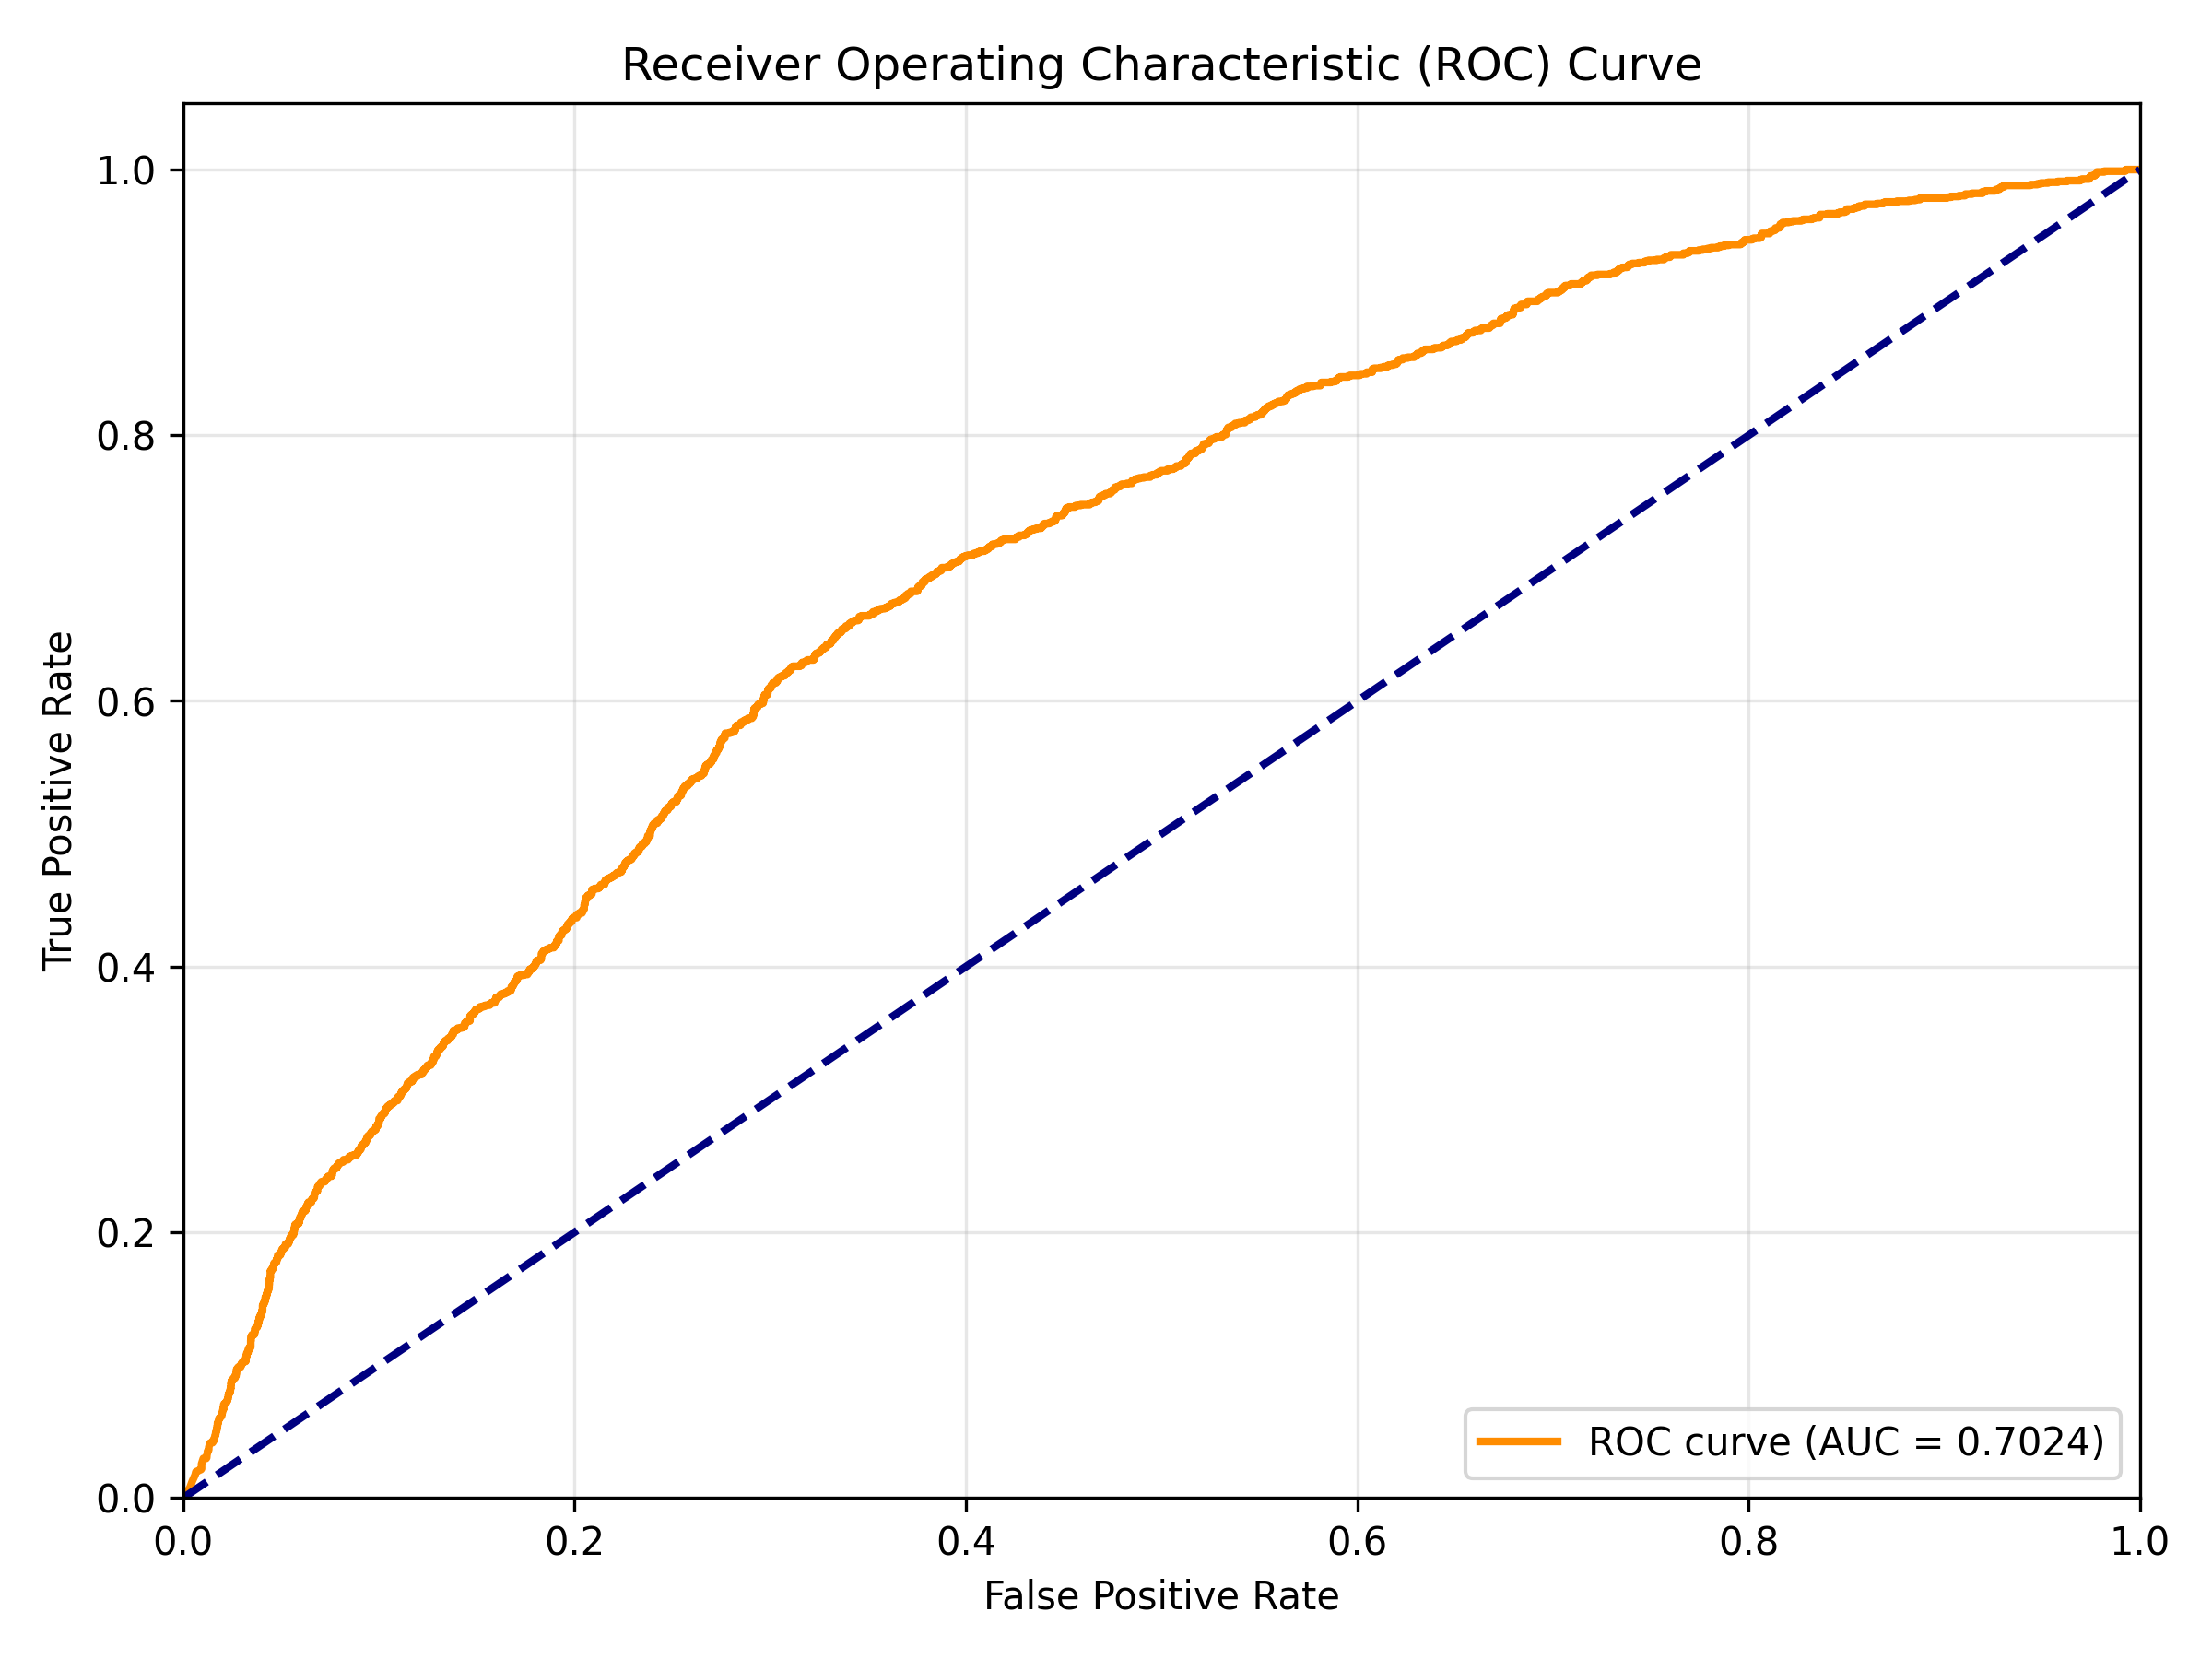

Evaluation Summary
Model: /content/MILRankingLoss_Sultani2018_ReImplementation/checkpoints/best_model.pth
Test videos: 290
Total segments: 9280
Anomaly segments: 1685 (18.2%)

Results:
  AUC: 0.7024
  Optimal threshold: 0.0000
  TPR at optimal: 0.6635
  FPR at optimal: 0.3455


In [50]:
%cd /content/MILRankingLoss_Sultani2018_ReImplementation

# Display ROC curve
from IPython.display import Image, display
import os

if os.path.exists('results/roc_curve.png'):
    display(Image('results/roc_curve.png'))

# Print evaluation results
if os.path.exists('results/evaluation_summary.txt'):
    !cat results/evaluation_summary.txt